# Titanic Dataset

**General Exploration**
1. How may passengers do we have the data for?
2. What are the different columns present in the dataset
3. What is the datatype of different columns
4. How many datapoints are missing in each of the columns?
5. How could we fill those values?
6. What was the maximum age of passenger? Minimum age?
7. What was the minimum fare? The Maximum fare? the average fare?
8. What was the approximate year in which the passengers were born?

**Visualization and exploration**
try and visualize these using different visualization techniques as far as possible

1. What % of passenger survived

2. How many male/female were on board, how many passenger were in each class?

3. What was the propotion of male to female passenger

4. What was the proportion of male/female based on survival

5. What was the chance of survival based on:

6. sex
age group (<16, 16-50, > 50)
passenger class
Combination of above?
Show the age distribution per ticket class, per sex

7. Distribution of ticket price by class

**Curiosity**

- Which ticket class did most of the largest families get? And which ticket class has the lowest proportion of female passengers who travelled solo out of all the female passengers in that class?

- Who was the oldest/youngest passenger

- Who were the oldest/youngest to survive/ die

- Oldest/ youngest by sex, class

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Pivot table

In [3]:
# Create a pivot table to summarize the survival count by passenger class and sex
pivot_table = titanic.pivot_table(index='class', columns='sex', values='survived', aggfunc='count')
pivot_table

sex,female,male
class,,
First,94,122
Second,76,108
Third,144,347


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## Null values

In [5]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

**Fill those null values**

In [6]:
titanic.age.mean(), titanic.age.median()

(29.69911764705882, 28.0)

In [7]:
titanic['age'].fillna(titanic.age.median(), inplace=True)

*deck column has more than 50% null values so drop the entire column*

In [8]:
titanic.drop('deck', axis=1, inplace=True)

*embarked and embarked_town has only 2 null values so drop these rows*

In [9]:
titanic.dropna(inplace=True)

In [10]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

## Max, min
- What was the maximum age of passenger? Minimum age?
- What was the minimum fare? The Maximum fare? the average fare?

In [11]:
titanic['age'].max(), titanic['age'].min()

(80.0, 0.42)

In [12]:
titanic['fare'].max(), titanic['fare'].min(), titanic['fare'].mean()

(512.3292, 0.0, 32.09668087739032)

## Visualization and Exploration

In [13]:
# Calculate the percentage of passengers who survived
survival_percentage = titanic['survived'].mean() * 100
print("Survival Percentage: {:.2f}%".format(survival_percentage))

titanic.survived.describe()[['count', 'mean']]

Survival Percentage: 38.25%


count    889.000000
mean       0.382452
Name: survived, dtype: float64

In [14]:
# Count the number of male and female passengers
titanic.groupby('sex').survived.describe()[['count', 'mean']]

,count,mean
sex,,
female,312.0,0.740385
male,577.0,0.188908


In [15]:
# Count the number of passengers in each passenger class
titanic.groupby('pclass').survived.describe()[['count', 'mean']]

,count,mean
pclass,,
1,214.0,0.626168
2,184.0,0.472826
3,491.0,0.242363


In [16]:
# Calculate the proportion of male to female passengers
df = titanic.groupby('sex').size()
gender_proportion = df['male'] / df['female']
print("Proportion of male to female passengers: {:.2f}".format(gender_proportion))

Proportion of male to female passengers: 1.85


In [17]:
# Calculate the proportion of male and female passengers based on survival
survived_gender_counts = titanic.groupby(['survived', 'sex']).size()
total_survived = survived_gender_counts[1].sum()
total_not_survived = survived_gender_counts[0].sum()
proportion_survived_male = survived_gender_counts[1]['male'] / total_survived
proportion_survived_female = survived_gender_counts[1]['female'] / total_survived
proportion_not_survived_male = survived_gender_counts[0]['male'] / total_not_survived
proportion_not_survived_female = survived_gender_counts[0]['female'] / total_not_survived

df = pd.DataFrame({
    'Survival': ['Survived', 'Survived', 'Not Survived', 'Not Survived'],
    'Sex': ['Male', 'Female', 'Male', 'Female'],
    'Proportion': [proportion_survived_male, proportion_survived_female, proportion_not_survived_male, proportion_not_survived_female]
})
df

,Survival,Sex,Proportion
0,Survived,Male,0.320588
1,Survived,Female,0.679412
2,Not Survived,Male,0.852459
3,Not Survived,Female,0.147541


In [18]:
# What was the chance of survival based on age group (<16, 16-50, > 50)

age_b16 = len(titanic[(titanic['age'] < 16) & (titanic['survived'] == 1)]) / len(titanic[titanic['survived'] == 1])
age_16t50 = len(titanic[(titanic['age'] >= 16) & (titanic['age'] <= 50) & (titanic['survived'] == 1)]) / len(titanic[titanic['survived'] == 1])
age_a50 = len(titanic[(titanic['age'] > 50) & (titanic['survived'] == 1)]) / len(titanic[titanic['survived'] == 1])
df = pd.DataFrame({
    'Age': ['<16', '16-50', '>50'],
    'Survival Proportion': [age_b16, age_16t50, age_a50]
})
df

,Age,Survival Proportion
0,<16,0.144118
1,16-50,0.794118
2,>50,0.061765


In [19]:
# What was the chance of survival based on passenger class?

In [20]:
survived_pclass_count = pd.DataFrame(titanic.groupby(['survived', 'pclass']).size(), columns=['Count'])
survived_pclass_count

Count
survived pclass       
0        1          80
         2          97
         3         372
1        1         134
         2          87
         3         119

**Show age distribution per ticket class**

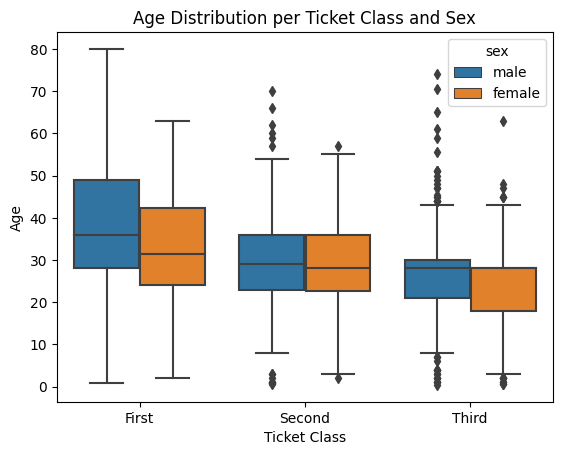

In [21]:
sns.boxplot(data=titanic, x='class', y='age', hue='sex')

# Set labels and title
plt.xlabel('Ticket Class')
plt.ylabel('Age')
plt.title('Age Distribution per Ticket Class and Sex')

# Display the plot
plt.show()

**Distribution of ticket price by class**

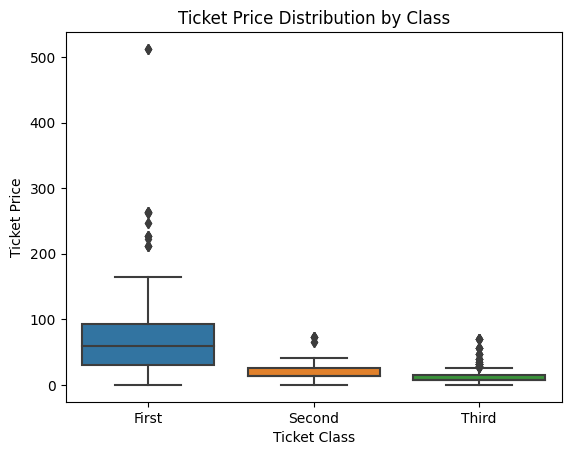

In [22]:
# Distribution of ticket price by class 

sns.boxplot(data=titanic, x='class', y='fare')

# Set labels and title
plt.xlabel('Ticket Class')
plt.ylabel('Ticket Price')
plt.title('Ticket Price Distribution by Class')

# Display the plot
plt.show()

In [25]:
# Who were the oldest/youngest to survive/die by sex, class

# Grouping the Titanic dataset by 'sex' and 'class'
grouped_titanic = titanic.groupby(['sex', 'class'])

# Finding the oldest and youngest individuals who survived or died
result = grouped_titanic.agg({'age': ['max', 'min']}).reset_index()

# Renaming the columns for clarity
result.columns = ['Sex', 'Class', 'Oldest', 'Youngest']

result

,Sex,Class,Oldest,Youngest
0,female,First,63.0,2.00
1,female,Second,57.0,2.00
2,female,Third,63.0,0.75
3,male,First,80.0,0.92
4,male,Second,70.0,0.67
5,male,Third,74.0,0.42
